## Data Preparation 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

from sklearn import svm
import numpy as np
import re
import string

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('/content/generated_AMAZON_FASHION_5.csv')
df = df.drop(columns='input_text')
df.head(5)

,target_text,generated_text
0,Pinnacle seems to have more cushioning so my h...,I have been using cushioning for the last 10 y...
1,"great price for the product, though the sizes ...",I was excited to find this product at such a c...
2,Good fit even after washing in hot water to fo...,I have a very nice Fit Wash that I can order a...
3,Great shoe. I've had Nike's before and have al...,I have been using these for over 30 years and ...
4,It looks a bit nicer on the picture. Its very ...,I like this bit of a picture of the light way ...


In [3]:
data_real = df[['target_text']].copy()
data_real.insert(1, 'label', 0)

In [4]:
data_fake = df[['generated_text']].copy()
data_fake.insert(1, 'label', 1)

In [5]:
data_real = data_real.rename(columns={'target_text':'text'})
data_fake = data_fake.rename(columns={'generated_text':'text'})

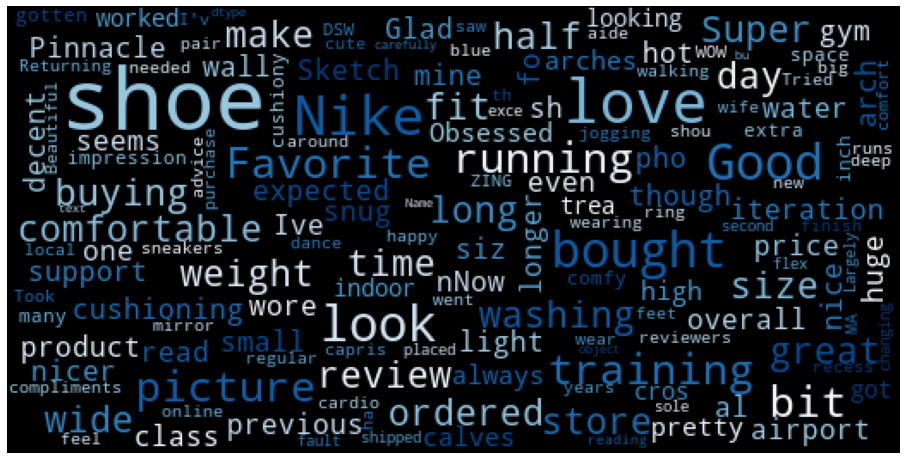

In [6]:
# Wordcloud of Real reviews
wordcloud = WordCloud(width=520, height=260, stopwords=set(STOPWORDS), max_font_size=50, background_color ="black", colormap='Blues').generate(str(data_real['text']))
plt.figure(figsize=(16,10))
plt.imshow(wordcloud)
plt.axis('off') # turn off axis
plt.show()

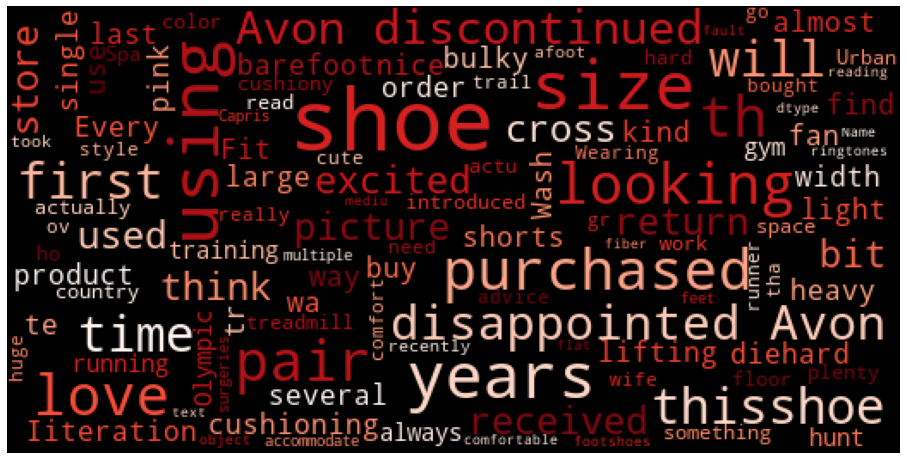

In [7]:
# Wordcloud of Fake reviews
wordcloud = WordCloud(width=520, height=260, stopwords=set(STOPWORDS), max_font_size=50, background_color ="black", colormap='Reds').generate(str(data_fake['text']))
plt.figure(figsize=(16,10))
plt.imshow(wordcloud)
plt.axis('off') # turn off axis
plt.show()

In [8]:
reviews = [data_real, data_fake]
data = pd.concat(reviews, ignore_index=True)
data = data.sample(frac=1).reset_index(drop=True)
data

,text,label
0,I am so disappointed that Avon discontinued th...,1
1,I purchased thisshoe for the first time and wa...,1
2,I took this picture because I didn't think it ...,1
3,I am so happy with this purchase. I feel like ...,0
4,"Largely my fault for not reading carefully, bu...",0
...,...,...
87,I have a size 9 shoe so I didn't need to go ov...,1
88,I have a very nice Fit Wash that I can order a...,1
89,I am so disappointed that Avon discontinued th...,1
90,My ring shipped the same day that I placed the...,0


## Data Preprocessing

In [9]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [10]:
data["text"] = data["text"].apply(wordopt)

In [11]:
X = data['text']
y = data['label']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [13]:
tfidf = TfidfVectorizer()
Xv_train = tfidf.fit_transform(X_train)
Xv_test = tfidf.transform(X_test)

## Logistic Regression

In [14]:
log = LogisticRegression()
log.fit(Xv_train,y_train)
pred_log = log.predict(Xv_test)

In [15]:
log.score(Xv_test, y_test)

0.8260869565217391

In [16]:
print(classification_report(y_test, pred_log))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85        11
           1       1.00      0.67      0.80        12

    accuracy                           0.83        23
   macro avg       0.87      0.83      0.82        23
weighted avg       0.87      0.83      0.82        23



## Decision Tree Classification

In [17]:
decision = DecisionTreeClassifier()
decision.fit(Xv_train, y_train)
pred_decision = decision.predict(Xv_test)

In [18]:
decision.score(Xv_test, y_test)

0.8695652173913043

In [19]:
print(classification_report(y_test, pred_decision))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87        11
           1       0.91      0.83      0.87        12

    accuracy                           0.87        23
   macro avg       0.87      0.87      0.87        23
weighted avg       0.87      0.87      0.87        23



## Gradient Boosting Classifier

In [20]:
gradient = GradientBoostingClassifier(random_state=0)
gradient.fit(Xv_train, y_train)
pred_gbc = gradient.predict(Xv_test)

In [21]:
gradient.score(Xv_test, y_test)

0.9130434782608695

In [22]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.92      0.92      0.92        12

    accuracy                           0.91        23
   macro avg       0.91      0.91      0.91        23
weighted avg       0.91      0.91      0.91        23



## Random Forest Classifier

In [23]:
random_forest = RandomForestClassifier(random_state=0)
random_forest.fit(Xv_train, y_train)
pred_rfc = random_forest.predict(Xv_test)

In [24]:
random_forest.score(Xv_test, y_test)

0.9130434782608695

In [25]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.92      0.92      0.92        12

    accuracy                           0.91        23
   macro avg       0.91      0.91      0.91        23
weighted avg       0.91      0.91      0.91        23



## SVM

In [29]:
svc_poly = svm.SVC(kernel='poly', C=1, degree=1).fit(Xv_train, y_train.values.ravel())
print("poly", svc_poly.score(Xv_test, y_test))

poly 0.8695652173913043


In [30]:
predictions_SVM = svc_poly.predict(Xv_test)
print(classification_report(y_test, predictions_SVM))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        11
           1       1.00      0.75      0.86        12

    accuracy                           0.87        23
   macro avg       0.89      0.88      0.87        23
weighted avg       0.90      0.87      0.87        23

